In [4]:
from util import *
from expval_calc_q_optim import *
from generate_training_set import *

from qiskit.utils import QuantumInstance 
from qiskit.test.mock import FakeVigo
from qiskit import Aer

import matplotlib.pyplot as plt

In [5]:
# Create appropriate instances
IBMQ.save_account('df2189d5239f6b7504f8c29f87daf1b145ab3029b540d836c4c53351a5b551ef2f9af4b4b7fee94ed8ef8788935fa6c60d9f0bc417b8957abccd7850e24196b4', overwrite=True)
IBMQ.load_account()
print(IBMQ.providers())
hardware_provider = IBMQ.get_provider(group='open')
hardware_backend = hardware_provider.get_backend('ibmq_belem')
em_instance = QuantumInstance(backend = hardware_backend, shots = 4096)
sv_backend = Aer.get_backend('aer_simulator_statevector')
ef_instance = QuantumInstance(backend = sv_backend)

ibmqfactory.load_account:WARNING:2022-02-25 19:53:56,548: Credentials are already in use. The existing account in the session will be replaced.


[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]


In [6]:
# LBEM
seed = 100

group_pauli_op, [ansatz,num_par_gates] = main('H2', 0.774, 2, 1, 'num_particle_preserving')
group_pauli_op = group_pauli_op['grouped_paulis']
print('Ansatz & qubit hamiltonian created')

trunc_T, trunc_P = truncate_training_set(num_par_gates, 0, 0, s = seed, exhaustive= True)
circuit_list = get_circuits_dict(ansatz, trunc_T, trunc_P, num_par_gates)
print('Training circuits generated')

com_ef, com_em = expval_calc(group_pauli_op, circuit_list, em_instance, ef_instance)
print('All expectation values calculated')

q = q_optimize(group_pauli_op, circuit_list, com_em, com_ef)
print('q optimized')

Ansatz & qubit hamiltonian created
Training circuits generated
All expectation values calculated
q optimized


In [7]:
# Test using some random angles
angles = (2*np.pi/20) * np.array(list(range(20)))
efs = []
ems = []
ns = []

for angle in angles:
    ef_expval, em_expval, n_expval = test(ansatz, [angle], group_pauli_op, q, ef_instance, em_instance)
    print('Angle: {} | Error free value: {} | Error mitigated value: {} | Noisy value: {}'.format(angle, ef_expval, em_expval, n_expval))
    
    efs.append(ef_expval)
    ems.append(em_expval)
    ns.append(n_expval)

Angle: 0.0 | Error free value: (0.7601782935585354+0j) | Error mitigated value: (0.740224541453387+0j) | Noisy value: (0.647985499572191+0j)
Angle: 0.3141592653589793 | Error free value: (0.509456832858257+0j) | Error mitigated value: (0.4765948214668185+0j) | Noisy value: (0.444266520044885+0j)
Angle: 0.6283185307179586 | Error free value: (0.06834387491332133+0j) | Error mitigated value: (0.03936401701008682+0j) | Noisy value: (0.07399208847217484+0j)
Angle: 0.9424777960769379 | Error free value: (-0.39467042321931056+0j) | Error mitigated value: (-0.4320746173652528+0j) | Noisy value: (-0.3170891411471013+0j)
Angle: 1.2566370614359172 | Error free value: (-0.7027303369301501+0j) | Error mitigated value: (-0.7128504291893412+0j) | Noisy value: (-0.5753035453829409+0j)
Angle: 1.5707963267948966 | Error free value: (-0.7381674497530155+0j) | Error mitigated value: (-0.7691115152852124+0j) | Noisy value: (-0.6304841153122429+0j)
Angle: 1.8849555921538759 | Error free value: (-0.48744598

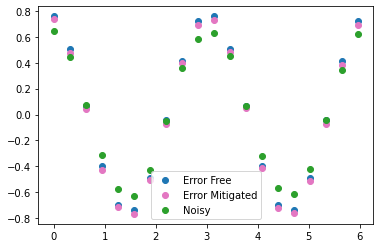

In [8]:
plt.scatter(angles, efs, c = 'tab:blue', label = 'Error Free')
plt.scatter(angles, ems, c = 'tab:pink', label = 'Error Mitigated')
plt.scatter(angles, ns, c = 'tab:green', label = 'Noisy')
plt.legend()

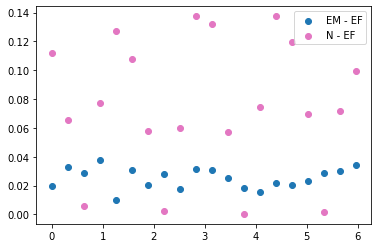

In [9]:
plt.scatter(angles, np.abs(np.array(ems) - np.array(efs)), c = 'tab:blue', label = 'EM - EF')
plt.scatter(angles, np.abs(np.array(ns) - np.array(efs)), c = 'tab:pink', label = 'N - EF')
plt.legend()

In [10]:
ansatz.draw()

┌───┐┌───┐                                                          »
q_0: ┤ X ├┤ X ├─────────────────────────────────■────────────────────────»
     └───┘└─┬─┘┌────────────────────┐┌───────┐┌─┴─┐┌────────────────────┐»
q_1: ───────■──┤ Ry(theta[0] + π/2) ├┤ Rz(π) ├┤ X ├┤ Ry(theta[0] + π/2) ├»
               └────────────────────┘└───────┘└───┘└────────────────────┘»
«              ┌───┐
«q_0: ─────────┤ X ├
«     ┌───────┐└─┬─┘
«q_1: ┤ Rz(π) ├──■──
«     └───────┘

In [11]:
q

(array([ 0.34333083,  0.04064677, -0.00282666,  0.01434463, -0.12032745,
         0.15315217,  0.10045897,  0.13403858, -0.16250407,  0.16205248,
         0.150938  ,  0.14218814,  0.26848026, -0.00701784, -0.02419921,
        -0.02382803, -0.02707583]),
 ['II',
  'IX',
  'IY',
  'IZ',
  'XI',
  'XX',
  'XY',
  'XZ',
  'YI',
  'YX',
  'YY',
  'YZ',
  'ZI',
  'ZX',
  'ZY',
  'ZZ',
  'q0'])